### 1: import library 

In [148]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os

In [151]:
print(os.getcwd())

C:\Users\hp\Downloads


### 2: load & read data

In [154]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

### 3: Explore data

In [159]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [161]:
data.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

### 3: Visualization on the data

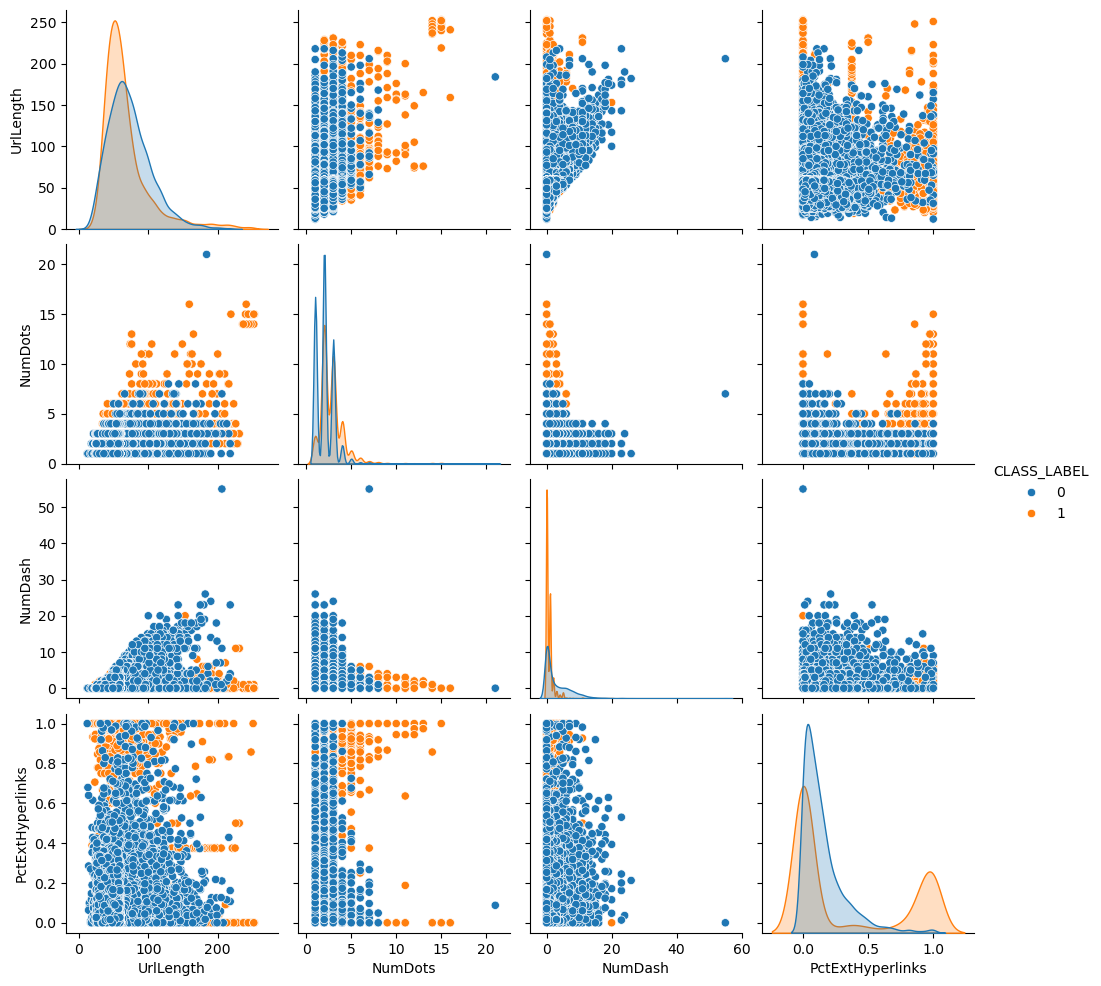

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant features for pairplot
selected_features = ['UrlLength', 'NumDots', 'NumDash', 'PctExtHyperlinks', 'CLASS_LABEL']
sns.pairplot(data[selected_features], hue='CLASS_LABEL')
plt.show()

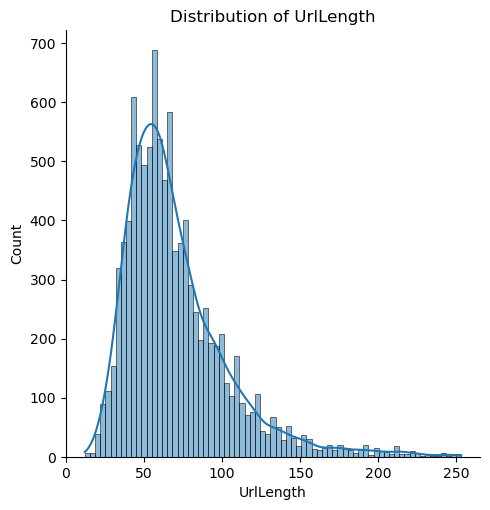

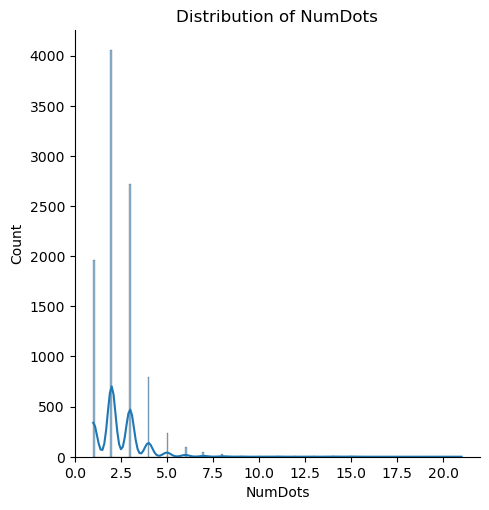

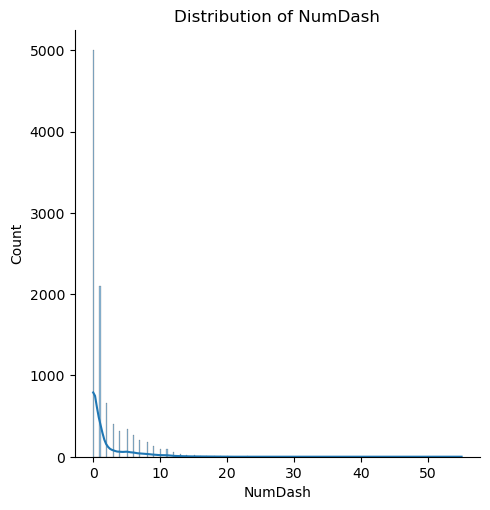

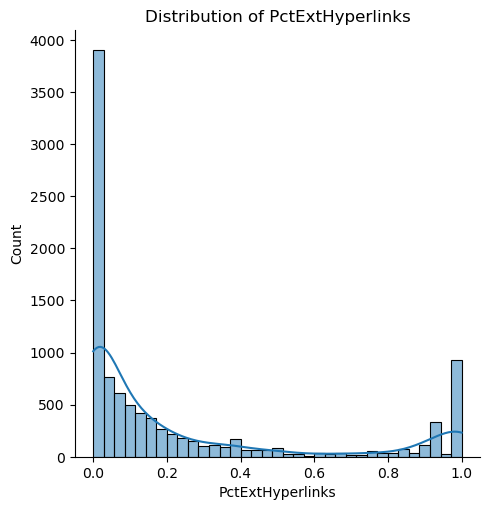

In [167]:
features_to_plot = ['UrlLength', 'NumDots', 'NumDash', 'PctExtHyperlinks']
for feature in features_to_plot:
    sns.displot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


### 4: Data Preprocessing

In [169]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [170]:
# drop name 
# drop gmail 
# handle Cuntry 

In [171]:
data.drop("id", axis=1, inplace=True)


In [172]:
data.dropna(inplace=True)

### 5: split the dataset

In [174]:
features = ['UrlLength', 'NumDots', 'NumDash', 'PctExtHyperlinks']
target = 'CLASS_LABEL'
X = data[features]
y = data[target]

In [175]:
X

,UrlLength,NumDots,NumDash,PctExtHyperlinks
0,72,3,0,0.000000
1,144,3,0,0.000000
2,58,3,0,0.375000
3,79,3,1,1.000000
4,46,3,0,1.000000
...,...,...,...,...
9995,50,3,0,0.096774
9996,59,2,1,0.161290
9997,57,2,0,0.070423
9998,49,3,0,0.166667


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
print("x_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (8000, 4)
y_train shape =  (8000,)
x_test shape =  (2000, 4)
y_test shape =  (2000,)


### 6: mode buliding

In [179]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [180]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [181]:
#predict values (sales)
y_pred = RF_model.predict(X_test)


In [182]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [183]:
X_test

,UrlLength,NumDots,NumDash,PctExtHyperlinks
6252,60,1,5,0.153846
4684,75,3,0,1.000000
1731,64,1,0,0.000000
4742,71,3,0,0.000000
4521,52,3,0,0.923077
...,...,...,...,...
6412,99,3,7,0.164179
8285,59,2,0,0.094891
7853,67,1,4,0.063636
1095,79,1,1,0.000000


### 7: Evalute Model

In [185]:
# call the function to Evalute your model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [186]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9230
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       988
           1       0.92      0.92      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



### Save the model to a file


In [188]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model training complete. Saved as 'model.pkl'.")

✅ Model training complete. Saved as 'model.pkl'.
